# Iris Data 

The Iris dataset is a classic and widely used dataset in the field of machine learning and statistics, first introduced by the British statistician Ronald A. Fisher in 1936. It consists of 150 observations of iris flowers, with each flower belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. For each flower, four features are measured in centimeters: sepal length, sepal width, petal length, and petal width. These features provide information about the physical characteristics of the flowers and are commonly used to distinguish between the different species. The dataset is balanced, containing 50 samples of each species, making it an excellent choice for practicing supervised learning techniques, particularly classification. Due to its simplicity and well-structured nature, the Iris dataset is often considered a “hello world” dataset in data science and is frequently used for demonstrations, visualizations, and algorithm testing.

## 1) Import Libraries

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For clean output 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Saving Best Model 
import pickle as pkl 


In [3]:
# Models and Utils 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

## 2) Loading Data 

In [4]:
# Read file
# Removing "Id" column 
df = pd.read_csv("Iris.csv").drop("Id" , axis = 1) 

# preview of data 
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Last rows
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 3. Data Exploration 
---
- **Data Info**
- **Statistical Summary**
- **Null Value Analaysis**
- **Features Exploration : Distribution , Feature vs Target**
- **Outliers Exploration**
- **Target Label Distribution**

In [6]:
# Data Info 
df.info(memory_usage = "deep") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.9 KB


In [7]:
# Statistical Summary
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Null Value Analaysis 
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

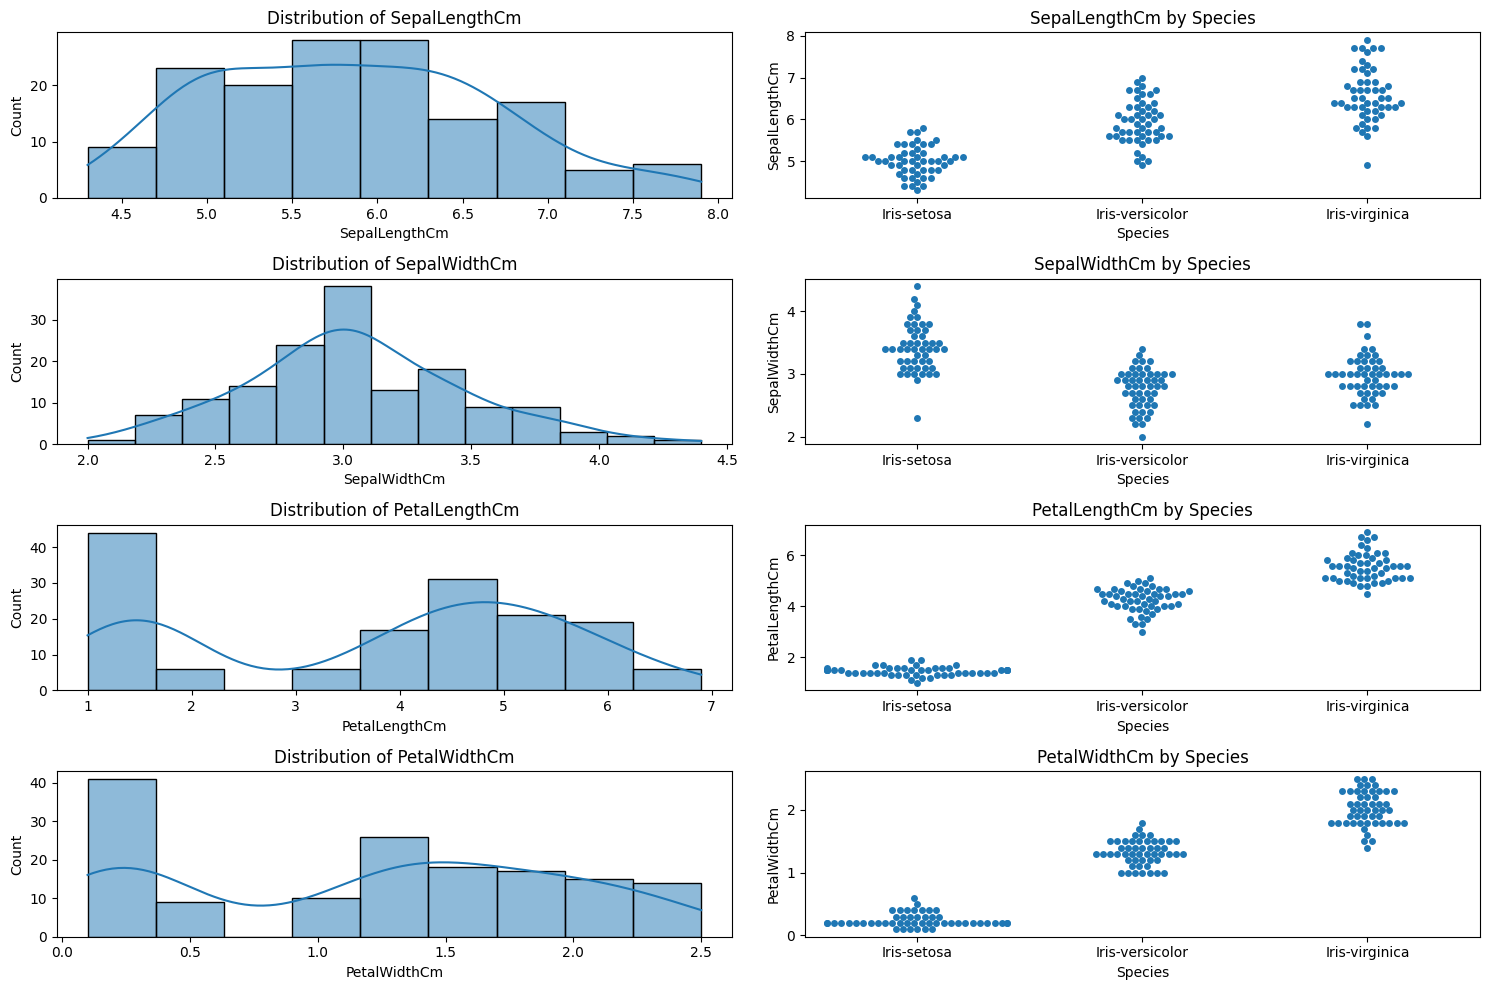

In [9]:
# Distribution Visuals 
plt.figure(figsize = (15 , 10))
for  i , col in enumerate(df.columns[:-1] , 1):
    # Distribution plot
    plt.subplot(4, 2, 2*i - 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Swarm plot
    plt.subplot(4, 2, 2*i)
    sns.swarmplot(x=df["Species"], y=df[col])
    plt.title(f'{col} by Species')
    
plt.tight_layout()
plt.show()

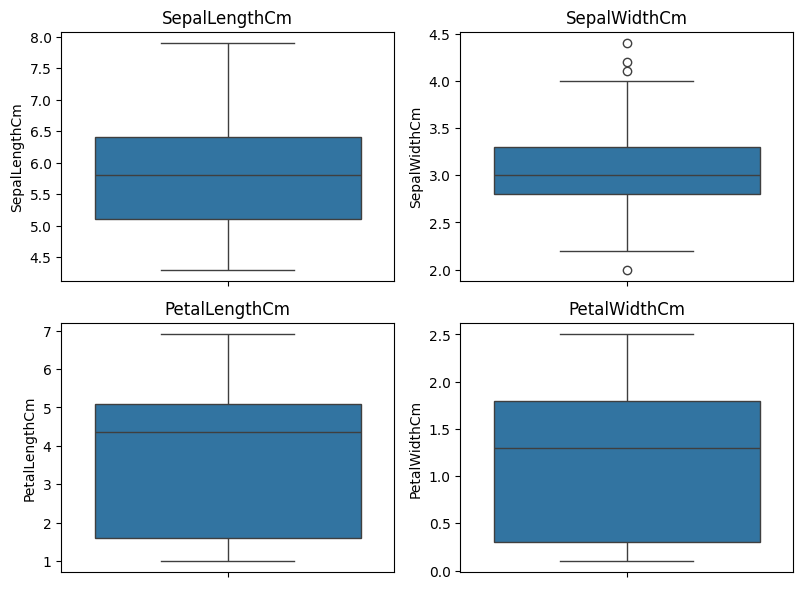

In [10]:
# Check for Outliers
plt.figure(figsize = (8 , 6))
for i , col in enumerate(df.columns[:-1] , 1):
    plt.subplot(2 , 2 , i)
    sns.boxplot(data = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Findings from boxplot : Outliers Minimal**

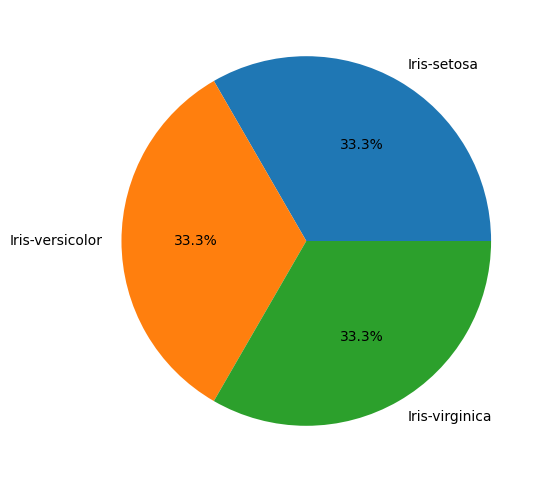

In [11]:
# Label/Class Pie Plot
plt.figure(figsize=(8 , 6))
round(df["Species"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.ylabel("")
plt.show()

**Pie Chart Findings : Classes are Equally Distributed**

## 4. Data Preprocessing 
---
- **Label Encoding : Label/Class (Species)**
- **Feature Selection**

In [12]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
# Label encoding 
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# # Standard Scaler 
# sc = StandardScaler()

# # numeric columns 
# numeric_cols = df.select_dtypes(["float64"]).columns
# df.loc[: , numeric_cols ] = sc.fit_transform(df.loc[: , numeric_cols])

# df

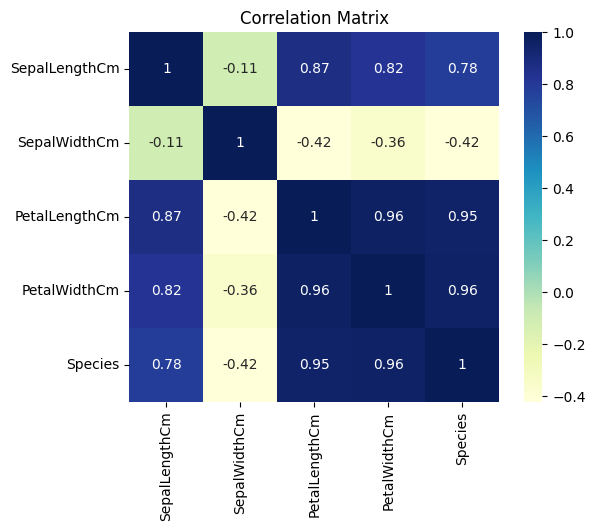

In [16]:
# Correlation matrix
sns.heatmap(df.corr() , annot=True , square=True , cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

#### Correlation Matrix Finding : All features are highly correlated to target variable

## 5. Data Split : Train , Test

In [17]:
# Split : Train , Test
X = df.drop("Species" , axis = 1)
y = df.Species
X_train , X_test  , y_train , y_test = train_test_split(X , y)

# Shape 
print("Train")
print(X_train.shape)
print(y_train.shape)

print("\nTest")
print(X_test.shape)
print(y_test.shape)

Train
(112, 4)
(112,)

Test
(38, 4)
(38,)


## 6. Model Building
---
- **Report Summarizer**
- **ML Pipeline**
- **Prediction**

In [18]:
# Summarizer
def ReportEncapsulator(y_test , y_pred):
    
    accuracy = metrics.accuracy_score(y_test , y_pred) # Accuracy score
    precision = metrics.precision_score(y_test , y_pred,average="macro") # Precision score
    recall = metrics.recall_score(y_test , y_pred,average="macro") # Recall score
    f1 = metrics.f1_score(y_test , y_pred,average="macro") # F1 Score
    classification_report = metrics.classification_report(y_test , y_pred) # Classification Report
    

    # Confusion matrix 
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt="d", cbar=False,cmap="Blues", 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()


    print("\n======================================================")
    print(f"\nAccuracy Score : {accuracy:.3f}")
    print(f"Precision Score : {precision:.3f}")
    print(f"Recall Score : {recall:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print("\nClassification Report : \n",classification_report)
    print("\n======================================================\n")

In [19]:
# Models
models = {
    "LogsticRegression":LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42) , 
    "NaiveBayes":GaussianNB() , 
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "DecisionTree":DecisionTreeClassifier(random_state=42),
    "RandomForest":RandomForestClassifier(random_state=42),
    "Neural Net":MLPClassifier(random_state=42),
}

In [20]:
# Finding the best model
def FindBestModel():
    best_accuracy = 0
    best_model = None

    for model in models.values():
        # ML pipeline
        model = Pipeline([
            ("scaler" , StandardScaler()) ,
            ("classifier" , model)],
            verbose=True
            )

        # Fitting Train data 
        model.fit(X_train , y_train)

        # Prediction & Report
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        ReportEncapsulator(y_test , y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model , best_accuracy

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


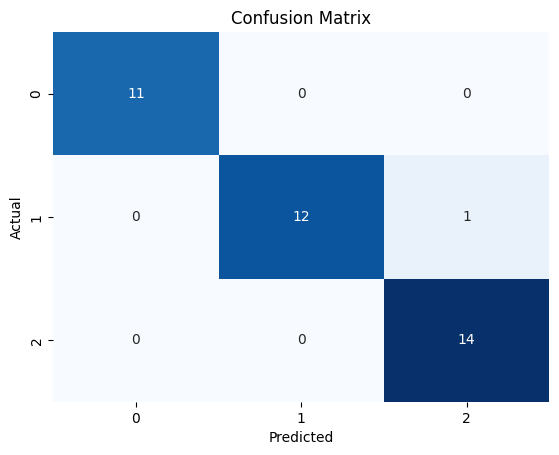



Accuracy Score : 0.974
Precision Score : 0.978
Recall Score : 0.974
F1 Score : 0.975

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


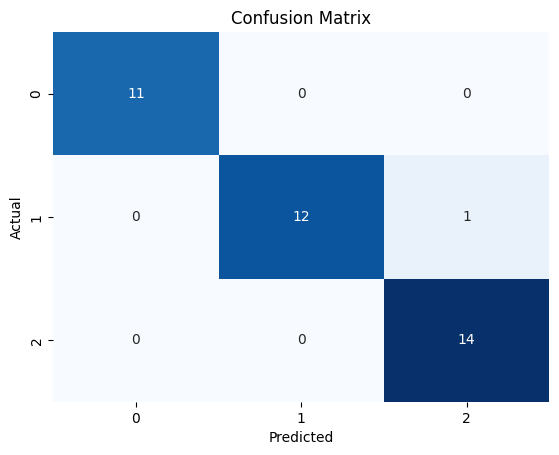



Accuracy Score : 0.974
Precision Score : 0.978
Recall Score : 0.974
F1 Score : 0.975

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


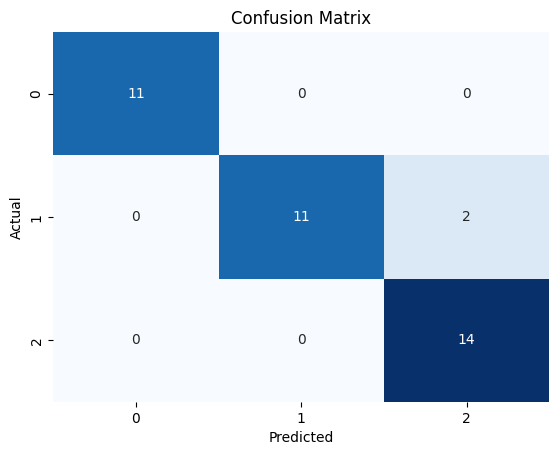



Accuracy Score : 0.947
Precision Score : 0.958
Recall Score : 0.949
F1 Score : 0.950

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


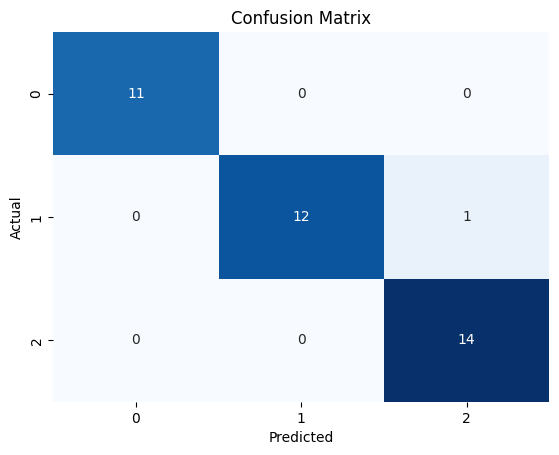



Accuracy Score : 0.974
Precision Score : 0.978
Recall Score : 0.974
F1 Score : 0.975

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


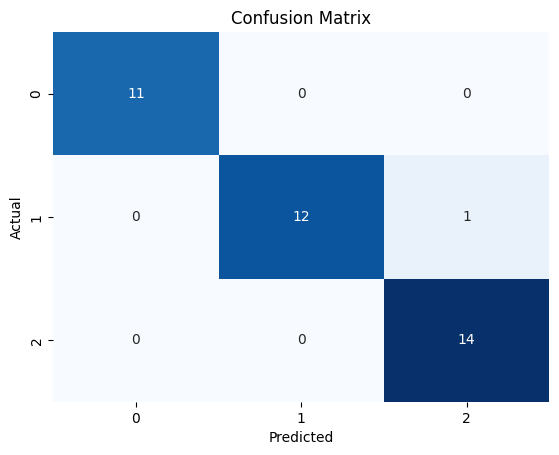



Accuracy Score : 0.974
Precision Score : 0.978
Recall Score : 0.974
F1 Score : 0.975

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s


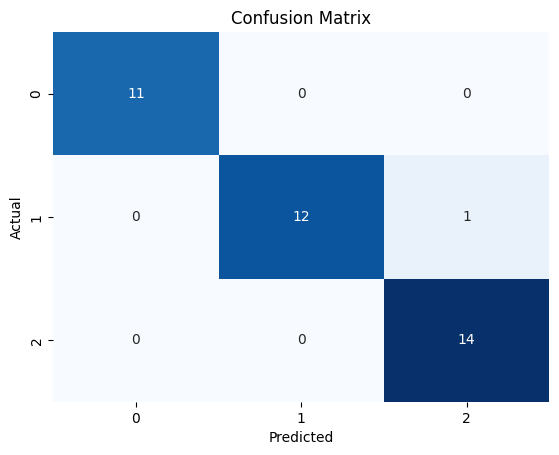



Accuracy Score : 0.974
Precision Score : 0.978
Recall Score : 0.974
F1 Score : 0.975

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


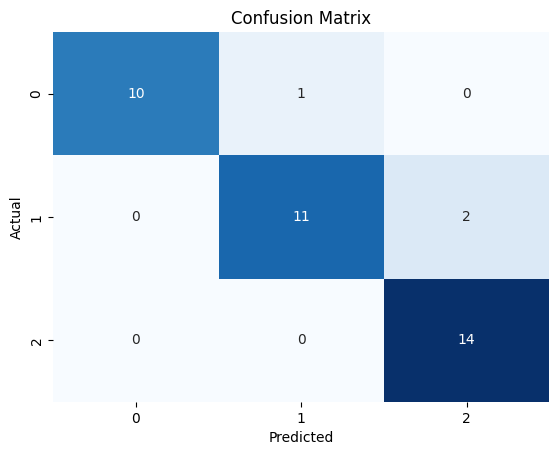



Accuracy Score : 0.921
Precision Score : 0.931
Recall Score : 0.918
F1 Score : 0.922

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.92      0.85      0.88        13
           2       0.88      1.00      0.93        14

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38





In [21]:
model , accuracy = FindBestModel()

In [ ]:
# Best Model 
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))],
         verbose=True)

In [28]:
# Best Accuracy
accuracy

0.9736842105263158

In [ ]:
with open("model.pkl" , "wb") as file:
    pkl.dump(model , file)